# Artificial Neural Networks: A Brief Introduction

黃杰 2022. 12

![](https://nbviewer.org/github/HuangJiaLian/DataBase0/blob/master/uPic/2022_12_01_14_WZbjZ0.jpg)
Image from [flatironschool.com](https://flatironschool.com/blog/deep-learning-vs-machine-learning/)

**Sigmoid Neuron**
<!-- ![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_18_2021_11_01_11_3CIDZe.jpg) -->
<!-- ![](https://nbviewer.org/github/HuangJiaLian/DataBase0/blob/master/uPic/2022_12_01_11_sigmoid.PNG) -->
![](https://nbviewer.org/github/HuangJiaLian/DataBase0/blob/master/uPic/2022_12_01_15_AatBI3.jpg)

<!-- import numpy as np 
import matplotlib.pyplot as plt 
x= np.linspace(-8, 8, 50)
y = 1/(1+np.e**(-x))
plt.ylabel('Sigmoid function $\sigma (x)$')
plt.xlabel('$x$')
plt.text(5,0.9,'Activated', bbox=dict(facecolor='green', alpha=0.5))
plt.text(-8,0.1,'Inactivated', bbox=dict(facecolor='red', alpha=0.5))
plt.plot(x, y)
plt.show() -->

- **Input**： $x_1, x_2, ...\in [0, 1]$; 
- **Output/activation**: $a = \sigma \left( \sum_{j} w_{j} x_{j} + b = w \cdot x + b \right )$

**The architecture of fully connected neural networks**

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_19_deep_neural_network_big.png' width='40%' />

Input layer --->  Many hidden layers ---> Output layer

**Activations of  a layer**
<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_20_deep_neural_network_big.png' width='40%'/>

$\mathbf{z}_i = \mathbf{W}^i  \mathbf{a}_h + \mathbf{b}_i$ => 
$a_{11} = \sigma \left ( w_{10}a_{00} + w_{11}a_{01} + w_{12}a_{02} + w_{13}a_{03} + b_{11}\right )$ 

$
\left[\begin{array}{l}a_{10} \\ a_{11} \\ a_{12} \\ a_{13} \\ a_{14} \end{array}\right]= \sigma \left ( \left[\begin{array}{llll}w_{00} & w_{01} & w_{02} & w_{13} \\ w_{10} & w_{11} & w_{12} & w_{13} \\ w_{20} & w_{21} & w_{22} & w_{23} \\ w_{30} & w_{31} & w_{32} & w_{33} \\ w_{40} & w_{41} & w_{42} & w_{43}\end{array}\right]\left[\begin{array}{l}a_{00} \\ a_{01} \\ a_{02} \\ a_{03}\end{array}\right]+\left[\begin{array}{l}b_{10} \\ b_{11} \\ b_{12} \\ b_{13} \\ b_{14}\end{array}\right] \right )
$

- The number of parameters in this layer: 5x4 + 5 = 25
- The tatal number of parameters of this neural network: 136

**Using neural nets to recognize handwritten digits**
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_15_0e0n5t.jpg)
<!-- > Make everything as simple as possible, but not simpler. -->

Q: How to find circle in images ?

## MNIST 
- Grey levels, 28x28
- **Supervised** data $\{\textbf{x}[i],  \textbf{y}[i]\}_{i=1, 2, ..., N}$
- $\textbf x[i]$,the $i$-th data value; $\textbf y[i]$, **label**
- Data-label **pair**: Training sample/data
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_07_16_kFu6OJ.jpg)


**Vectorizing input**

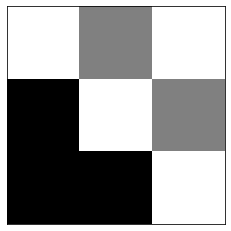

In [62]:
x = np.array([[1, 0.5, 1],
                        [0,   1,  0.5],
                        [0,   0,     1]])
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.show()

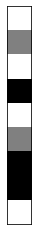

In [63]:
v_x = x.reshape((-1,1))
plt.imshow(v_x, cmap=plt.get_cmap('gray'))
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.show()

**One-hot representation of labels**

In [47]:
size = 10
nums = np.arange(size)
for label in range(size):
    one_hot = (nums==label).astype(int)
    print("Label: ", label, " in one-hot representation: ", one_hot)

Label:  0  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
Label:  1  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
Label:  2  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
Label:  3  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
Label:  4  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
Label:  5  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
Label:  6  in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
Label:  7  in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
Label:  8  in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
Label:  9  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


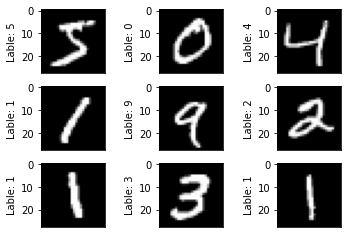

In [48]:
import mnist_loader
import matplotlib.pyplot as plt 
import numpy as np 

# loading
training_data, _, test_data = mnist_loader.load_data_wrapper()
temp_train = list(training_data)
temp_test = list(test_data)

# print('Training Sample Number: ' + str(len(temp_train)))
# print('Testing Sample Number: ' + str(len(temp_test)))


# plotting
for i in range(9):  
    plt.subplot(3, 3, i+1)
    plt.imshow(temp_train[i][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.ylabel('Lable: {}'.format(np.argmax(temp_train[i][1])))
    plt.tick_params(bottom=False, labelbottom=False)
plt.show()

# # indexing
# print(temp_train[0][0])
# print(temp_train[0][1])

In [49]:
training = np.array(temp_train)

/var/folders/vv/nz845l391yg8jtlw9vtc1qq80000gn/T/ipykernel_46839/2692572179.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(temp_train)


In [50]:
np.save('train_x.npy', training[:, 0])

## Neural Network Structure
![](https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_02_13_gakSOK.jpg)

- A training input $x$ : A 28x28 = 784 dimensional vector.
- The corresponding (lable) desired output: $y=y(x)$, where $y$ is a 10-dimensional vector.
- Training sample

## Objective
We'd like is an algorithm which lets us find weights and biases so that the outputs $a_{w,b}(x)$ from the network approximates the corresponding labels $y(x)$ for all training inputs $x$. 

To quantify how well we're achieving this goal we define a cost function:

$$
C(w, b) \equiv \frac{1}{n} \sum_{x} C_{x} = \frac{1}{2 n} \sum_{x}\|y(x)-a_{w,b}(x)\|^{2}
$$

- $w$, the collection of all weights in the network
- $b$, all the biases
- $n$, the total number of training inputs
- $a$, the vector of outputs from the network when $x$ is input
- Notation $\|v\|$ denotes the usual length function for a vector $v$.
- This cost function is also sometimes knowns as the mean squared error or MSE.

## How to find the right weights and biases?
Recapping, our goal in training a neural network is to find weights and biases which minimize the cost function $C(w,b)$. 

$$
w^{*}, b^{*}=\arg \min _{w, b} C(w,b)
$$

Okay, let's suppose we're trying to minimize some function, $C(v)$. This could be any real-valued function of many variables, $v=v1,v2,….$

<img src='https://cdn.jsdelivr.net/gh/HuangJiaLian/DataBase0@master/uPic/2021_11_08_11_grediant.png' width = '50%'/>

$$
\Delta C \approx \frac{\partial C}{\partial v_{1}} \Delta v_{1}+\frac{\partial C}{\partial v_{2}} \Delta v_{2}
$$

We'll also define the **gradient** of $C$ to be the vector of partial derivatives, 

$$
\nabla C \equiv\left(\frac{\partial C}{\partial v_{1}}, \frac{\partial C}{\partial v_{2}}\right)^{T}
$$

$$
\Delta C \approx \nabla C \cdot \Delta v
$$

## Update policy
Choose 
$$
\Delta v=-\eta \nabla C
$$

$$
\Delta C \approx-\eta \nabla C \cdot \nabla C=-\eta\|\nabla C\|^{2}
$$

$$
v \rightarrow v^{\prime}=v-\eta \nabla C
$$

If we keep doing this, over and over, we'll keep decreasing $C$ until - we hope - we reach a global minimum.

$$
w_{k} \rightarrow w_{k}^{\prime}=w_{k}-\eta \frac{\partial C}{\partial w_{k}}
$$

$$
b_{l} \rightarrow b_{l}^{\prime}=b_{l}-\eta \frac{\partial C}{\partial b_{l}}
$$

- **Gradient descent**
- **Trianing**/learning process
- **Learning rate** $\eta$

## Stochastic gradient descent
$$
C=\frac{1}{n} \sum_{x} C_{x}
$$

$$
C_{x} \equiv \frac{\|y(x)-a\|^{2}}{2}
$$

In practice, to compute the gradient $\nabla C$ we need to compute the gradients $\nabla C_{x}$ separately for each training input, $x$, and then average them, $\nabla C=\frac{1}{n} \sum_{x} \nabla C_{x}$.

We'll label those random training inputs $X_1$,$X_2$,…,$X_m$, and refer to them as a mini-batch.

$$
\frac{\sum_{j=1}^{m} \nabla C_{X_{j}}}{m} \approx \frac{\sum_{x} \nabla C_{x}}{n}=\nabla C
$$

$$
\nabla C \approx \frac{1}{m} \sum_{j=1}^{m} \nabla C_{X_{j}}
$$

- Batch size
- Epoch

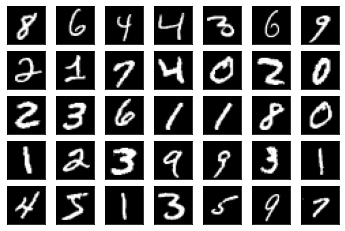

In [51]:
import random
indexes = np.arange(35)
random.shuffle(indexes)
for j, i in zip(range(35), indexes):  
    plt.subplot(5, 7, j+1)
    plt.imshow(temp_train[i][0].reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
plt.show()

## Implementing our network to classify digits
- Load training data 
- Training
- Save & load

In [64]:
import mnist_loader
import network

In [65]:
# Loading training data
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [67]:
# Building network
net = network.Network([784, 30, 10])

In [68]:
# Training
net.SGD(training_data, 5, 30, 1.0, test_data=test_data)

Epoch 0 : 7067 / 10000
Epoch 1 : 7748 / 10000
Epoch 2 : 8609 / 10000
Epoch 3 : 8874 / 10000
Epoch 4 : 8955 / 10000


In [69]:
# Saving model
net.save_model()

Model saved.


(784, 1)
2


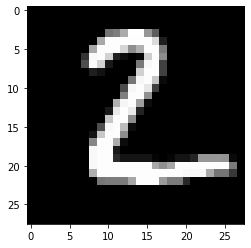

[[5.03250735e-03]
 [2.89766127e-04]
 [9.14280047e-01]
 [1.09286533e-02]
 [2.93725512e-07]
 [5.22442693e-02]
 [3.48512506e-02]
 [4.85405317e-04]
 [1.41131509e-01]
 [1.34994318e-05]]


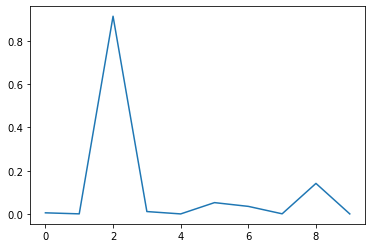

The prediction: 2


In [72]:
# Pridicting
testing_sample = temp_test[1]
x = testing_sample[0]
# print(x)
lable = testing_sample[1]
print(x.shape)
print(lable)
plt.imshow(x.reshape((28,28)), cmap=plt.get_cmap('gray'))
plt.show()

output = net.feedforward(x)
print(output)
plt.plot(output)
plt.show()

print('The prediction: {}'.format(np.argmax(output)))

In [58]:
# # Pridicting
# x = np.load('test_img.npy')
# plt.imshow(x.reshape((28,28)), cmap=plt.get_cmap('gray'))
# plt.show()

# output = net.feedforward(x)
# print(output)
# plt.plot(output)
# plt.show()
# print('The prediction: {}'.format(np.argmax(output)))

In [59]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt

# # reads image as grayscale
# x = cv2.imread('test_imgs/2.png', 0) 
# x = 255. - x
# x = x/255.
# x = cv2.resize(x, (28,28), interpolation= cv2.INTER_LINEAR)
# plt.imshow(x, cmap='gray')
# plt.show()


# x = x.reshape((-1,1))
# output = net.feedforward(x)
# print(output)
# plt.plot(output)
# plt.show()
# print('The prediction: {}'.format(np.argmax(output)))

# Summary
1. The architecture of neural networks
2. A classification problems using neural networks

![](https://nbviewer.org/github/HuangJiaLian/DataBase0/blob/master/uPic/2022_12_01_15_gNutHx.png)